### Notebook for plotting integrated (surface+subgrid) reactive transport SINGLE REACH
$ \color{green }{\text{Model domain:}}$ single stream : Length = 3000 m, Width = 1 m, dx = 50 m, dy= 1 m, Q = 0.1 m$^3$/sec

$ \color{green }{\text{Subgrid model:}}$ LogNormal travel time distribution with mean lifetime of 5 hours

$\color{green}{\text{Mesh:}}$ generated logical mesh

$\color{green}{\text{Bondary conditions:}}$ prescribed concentration at the inlet boundary (cell-based source at x=0 m)

$\color{green}{\text{Initial conditions:}}$ provided by pflotran (see data/pflotran_in/denitrification_reach.in)

$\text{Diffusion = 0.0 m$^2$/sec, Dispersion = 0}$

$\color{green}{\text{Simulation time :}}$ 10 hours

$\color{green}{\text{Chemsitry:}}$ denitrification

$\color{green}{\text{Benchmark:}}$ 15% Nitrate removel (from Scott's simulation using Mathematica)

$\color{green}{\text{Plotting:}}$  DOM, Nitrate and Oxygen removel in percentage against vs travel distance.

In [1]:
import sys, os, math, h5py, csv
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
sys.path.append('/Users/ajc/Core/codes/simulator/debug/ats/tools/utils')
import read_helper as read
import seaborn as sns

In [2]:
path = '/Users/ajc/FUSE/simulations/tests/ats-demos/13_reactive_transport/04_hyporheic'

In [3]:
F= ['test'] 
Files = [os.path.join(path,f,'visdump_surface_data.h5') for f in F]
vars = ['surface-total_component_concentration', 'surface-total_component_concentration','surface-total_component_concentration']
Suffix = ['.cell.DOM1', '.cell.NO3-', '.cell.O2(aq)']
Colors = ['r','k','m']
F_L = ['DOM1', 'NO3', 'O2']

/Users/ajc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/Users/ajc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


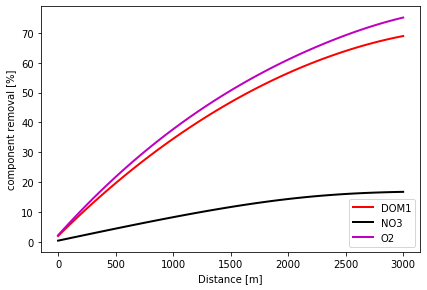

In [4]:
#%matplotlib tk
fig, axs = plt.subplots(1,1, figsize=(6,4), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
#axs = axs.ravel()
X = np.linspace(0,3000,60) # <-- mesh resolution

for i, v in enumerate(vars):
    plt.subplot(111)
    for j,f in enumerate(Files):
        dat = read.GetSurfVarFromVis_All(f,v,suffix=Suffix[i])[v]
        
        data = np.array(dat[-1])
        data_pc = [100*(dat[0][0] - d1 )/dat[0][0] for d1 in data] # Percentage reduction
        #plt.semilogy(X,1e-3*data,color=Colors[i],label=F_L[i],linewidth=2)
        
        plt.plot(X,data_pc,color=Colors[i],label=F_L[i],linewidth=2)
        
    plt.ylabel('component removal [%]')    
    #plt.ylabel(vars[i] + ' [M]') # Molarity = Moles/liter
    plt.xlabel('Distance [m]')
    
#plt.title('Location = 1000 m')
#plt.ylim(1e-6,1e-3)
#plt.ylim(1e-6,15)
#plt.xlim(0,50)


plt.legend(loc='lower right',fontsize=10)
plt.show()

In [5]:
#outfile="/Users/ajc/Core/PostProcessing/ReactiveTransport/Hyporheic/Coweeta/June4/"

In [57]:
#%matplotlib qt
def subgrid_C(sg_file,sg_var, suff):
        sgC_data = read.GetSurfVarFromVis_All(sg_file,sg_var,suffix=suff)
        sgConcentration = sgC_data[sg_var]
        return sgConcentration

Hyporheic_age_sec = [1537.88,1049.99,867.80,832.14,841.39,875.87,930.08,1003.36,1097.76,1217.63,1370.10,1566.33,1824.00,2172.24,2661.90,3389.38,4559.96,6693.86,11566.29,31446.39]
Hyporheic_age = np.cumsum([s/3600 for s in Hyporheic_age_sec])
def plot_surface_subgrid(cycle, X1 = [0]):

    #X = np.linspace(0,3000,60+1,dtype='i')
    #X1 = np.linspace(0,len(X),len(X),dtype='i')
    X = X1
    
    n_taus = 20
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))#,facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1,1]})
    fig.subplots_adjust(hspace =.5, wspace=.002)
    plt.tight_layout()
    axs = axs.ravel()
   
    for i,x1 in enumerate(X1):
        for c1, c in enumerate(Suffix):
            sg_infile = os.path.join(path,F[0],'visdump_subgrid_%s_data.h5'%x1)
            
            sg_var='subgrid_%s-total_component_concentration'%x1
            print (sg_var)
            dat1 = subgrid_C(sg_file=sg_infile,sg_var=sg_var, suff=c)
            
            dat11a = 1e+6*1e-3*np.reshape(dat1,(-1,n_taus))
            
            dat11 = dat11a[cycle]
            
            axs[c1].semilogy(Hyporheic_age,dat11,'-',label='cell=%s_%s'%(x1,c))
            axs[c1].set_ylim(np.min(dat11),np.max(dat11)+100)
            #axs[c1].ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
            axs[c1].set_xlabel('Hyporheic age [hour]')
            axs[c1].set_xlabel(r'Concentration [$\mu M$]')
            
            
            
           
            axs[c1].legend(loc='best', fontsize=9)
    #plt.savefig(outfile + "fig1.png",dpi=100)
    plt.show()

subgrid_0-total_component_concentration
subgrid_0-total_component_concentration
subgrid_0-total_component_concentration
subgrid_9-total_component_concentration
subgrid_9-total_component_concentration
subgrid_9-total_component_concentration


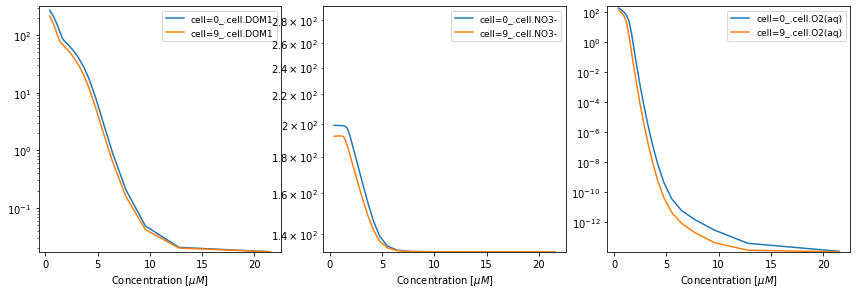

In [58]:
plot_surface_subgrid(cycle = 100, X1 = [0,9])